# Consultas 

## Definição da Constelação de Fatos

**Tabelas de dimensão**

- dim_data (data_pk, data_completa, data_dia, data_mes, data_semestre, data_ano)
- dim_localidade (localidade_pk, latitude, longitude, cidade, estado, regiao, pais)
- dim_tipo_cancer (tipo_cancer_pk, tipo_cancer, mortalidade, taxa_incidencia_total)
- dim_faixa_etaria (faixa_pk, faixa_idade, idade_min, idade_max, id_idade)
- dim_metrica (metrica_pk, tipo_metrica)
- dim_sexo (sexo_pk, sexo)

**Tabelas de fatos**

- fato_cancer (ano_pk, estado_pk, tipo_cancer_pk, sexo_pk, faixa_pk, metrica_pk, obitos_cancer, incidencia_cancer, prevalencia_cancer)
- fato_clima (data_pk, localidade_pk, temperatura_media, temperatura_max, temperatura_min, radiacao_uv, radiacao_uva, radiacao_uvb, precipitacao)

**Views**

- vw_cidade (localidade_pk, latitude, longitude, clima_cidade, clima_estado, clima_regiao, clima_pais)
- vw_estado (estado_pk, cancer_regiao, cancer_pais)
- vw_dia (data_pk, clima_data_completa, clima_dia, clima_mes, clima_semestre, clima_ano)
- vw_ano (ano_pk, cancer_ano, cancer_decada)

In [35]:
import os
from dotenv import load_dotenv
from sqlalchemy import create_engine
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

load_dotenv()

DB_HOST = os.getenv("DB_HOST")
DB_PORT = os.getenv("DB_PORT")
DB_NAME = os.getenv("DB_NAME")
DB_USER = os.getenv("DB_USER")
DB_PASSWORD = os.getenv("DB_PASSWORD")

engine = create_engine(f'postgresql+psycopg2://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}')


### Exemplo

In [39]:
query = """
SELECT
    e.cancer_estado,
    SUM(CAST(f.obitos_cancer AS FLOAT)) AS total_obitos,
    SUM(CAST(f.incidencia_cancer AS FLOAT)) AS total_incidencia,
    SUM(CAST(f.prevalencia_cancer AS FLOAT)) AS total_prevalencia
FROM
    fato_cancer f
JOIN
    vw_estado e ON e.estado_pk = f.estado_pk
JOIN
    dim_metrica m ON m.metrica_pk = f.metrica_pk
WHERE
    m.tipo_metrica LIKE 'Taxa'
GROUP BY
    e.cancer_estado
ORDER BY
    total_incidencia DESC;
"""


df = pd.read_sql(query, engine)
df

,cancer_estado,total_obitos,total_incidencia,total_prevalencia
0,Goiás,12993.047,392710.720,57159.055
1,São Paulo,15960.374,392537.802,52663.525
2,Santa Catarina,23858.165,391199.102,67607.390
3,Sergipe,15374.809,282108.022,53571.422
4,Minas Gerais,9120.450,233174.681,39857.006
5,Mato Grosso,11680.209,230390.188,48306.518
6,Distrito Federal,26481.694,208781.710,37977.507
7,Rio de Janeiro,13472.383,171378.065,30430.556
8,Mato Grosso do Sul,14236.132,158181.056,35014.882
9,Rio Grande do Norte,17386.718,158019.762,41719.777


Index(['cancer_estado', 'total_obitos', 'total_incidencia',
       'total_prevalencia'],
      dtype='object')


/tmp/ipykernel_918997/2667981602.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='cancer_estado', y='total_incidencia', palette='rocket')


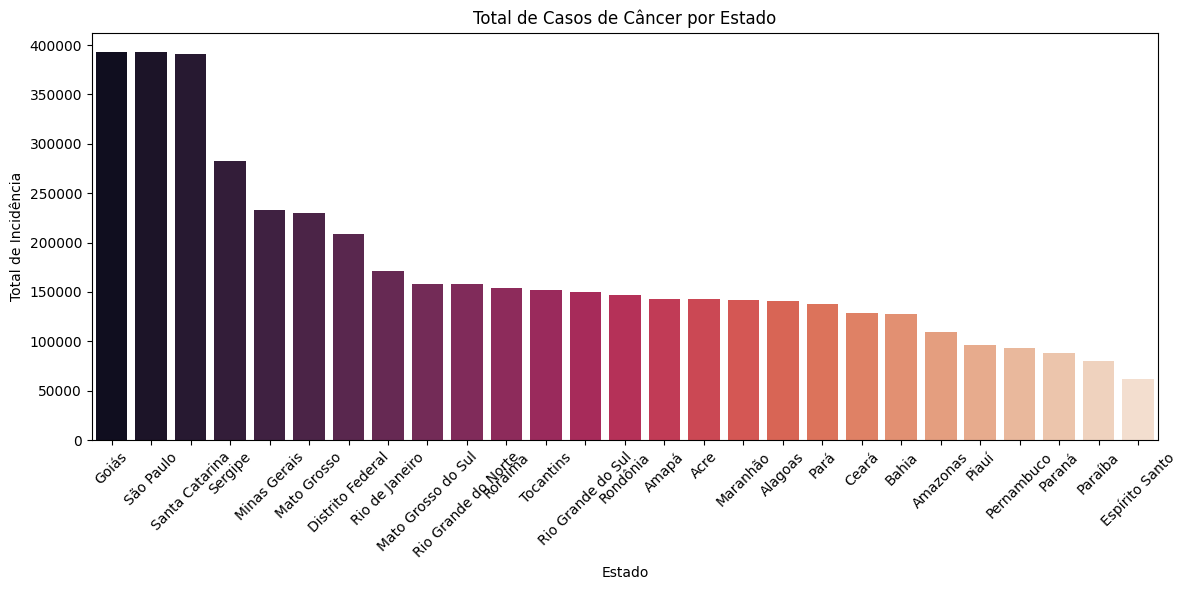

In [ ]:
print(df.columns)

plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='cancer_estado', y='total_incidencia', palette='rocket')

plt.title('Total de Casos de Câncer por Estado')
plt.xlabel('Estado')
plt.ylabel('Taxa de Incidência')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Roll-Up

### Slice and Dice

### Pivot

### Drill-Across